<a href="https://colab.research.google.com/github/Papaxristos/AgroPredict-AI/blob/main/AgroPredict_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from google.colab import drive
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from IPython.display import display
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_auc_score


# Define the data path
base_path = '/content/drive/My Drive/Python Projects/AgroPredict AI/'

# File paths
crop_data_path = os.path.join(base_path, 'crop.csv')
soil_data_path = os.path.join(base_path, 'SOIL DATA GR.xlsx')
weather_data_path = os.path.join(base_path, 'weather.csv')

# Verify the file paths
print(crop_data_path)
print(soil_data_path)
print(weather_data_path)

# Load crop data
crop_data = pd.read_csv(crop_data_path)
print("Crop Data:")
display(crop_data)  # Display all the data

# Load soil data from Excel
soil_data = pd.read_excel(soil_data_path)
print("Soil Data:")
display(soil_data)  # Display all the data

# Load weather data
weather_data = pd.read_csv(weather_data_path)
print("Weather Data:")
display(weather_data)  # Display all the data


Mounted at /content/drive
/content/drive/My Drive/Python Projects/AgroPredict AI/crop.csv
/content/drive/My Drive/Python Projects/AgroPredict AI/SOIL DATA GR.xlsx
/content/drive/My Drive/Python Projects/AgroPredict AI/weather.csv
Crop Data:


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


Soil Data:


,ID,Sand %,Clay %,Silt %,pH,EC mS/cm,O.M. %,CACO3 %,N_NO3 ppm,P ppm,K ppm,Mg ppm,Fe ppm,Zn ppm,Mn ppm,Cu ppm,B ppm
0,1,42.0,38.0,20.0,5.162,0.274,3.783414,0.00,14.462366,18.608840,147,1115,91.32,0.894,27.060,1.768,0.40
1,2,54.0,26.0,20.0,6.071,0.355,1.451688,0.00,14.587814,32.742137,180,1055,60.04,3.660,17.580,1.684,0.41
2,3,28.0,36.0,36.0,6.921,0.675,1.767599,0.40,14.910394,19.024525,183,1215,61.24,3.060,18.000,1.840,0.46
3,4,58.0,20.0,22.0,7.704,0.355,0.718322,6.80,4.211470,6.276846,116,327,19.54,1.640,5.040,0.844,0.50
4,5,33.2,41.2,25.6,7.609,0.392,0.996625,4.39,6.111111,6.553970,228,939,25.84,0.180,7.160,1.216,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,777,26.0,46.0,28.0,6.720,0.454,2.080000,0.00,7.660000,20.670000,395,500,38.07,0.394,26.480,1.468,0.33
777,778,40.0,28.0,32.0,7.790,0.343,1.380000,30.00,5.200000,4.140000,286,154,12.79,0.241,6.328,0.603,0.12
778,779,34.0,28.0,38.0,7.630,1.135,1.870000,24.30,17.130000,6.900000,582,164,10.73,0.439,5.390,1.141,0.26
779,780,16.0,38.0,46.0,7.730,0.393,1.720000,46.30,3.920000,7.930000,335,572,11.61,0.263,3.770,2.195,0.27


Weather Data:


,Data.Precipitation,Date.Full,Date.Month,Date.Week of,Date.Year,Station.City,Station.Code,Station.Location,Station.State,Data.Temperature.Avg Temp,Data.Temperature.Max Temp,Data.Temperature.Min Temp,Data.Wind.Direction,Data.Wind.Speed
0,0.00,2016-01-03,1,3,2016,Birmingham,BHM,"Birmingham, AL",Alabama,39,46,32,33,4.33
1,0.00,2016-01-03,1,3,2016,Huntsville,HSV,"Huntsville, AL",Alabama,39,47,31,32,3.86
2,0.16,2016-01-03,1,3,2016,Mobile,MOB,"Mobile, AL",Alabama,46,51,41,35,9.73
3,0.00,2016-01-03,1,3,2016,Montgomery,MGM,"Montgomery, AL",Alabama,45,52,38,32,6.86
4,0.01,2016-01-03,1,3,2016,Anchorage,ANC,"Anchorage, AK",Alaska,34,38,29,19,7.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16738,0.08,2017-01-01,1,1,2017,Casper,CPR,"Casper, WY",Wyoming,23,32,15,23,19.98
16739,0.00,2017-01-01,1,1,2017,Cheyenne,CYS,"Cheyenne, WY",Wyoming,32,42,21,26,15.16
16740,0.00,2017-01-01,1,1,2017,Lander,LND,"Lander, WY",Wyoming,17,29,4,26,1.65
16741,0.06,2017-01-01,1,1,2017,Rawlins,RWL,"Rawlins, WY",Wyoming,23,31,13,24,18.16


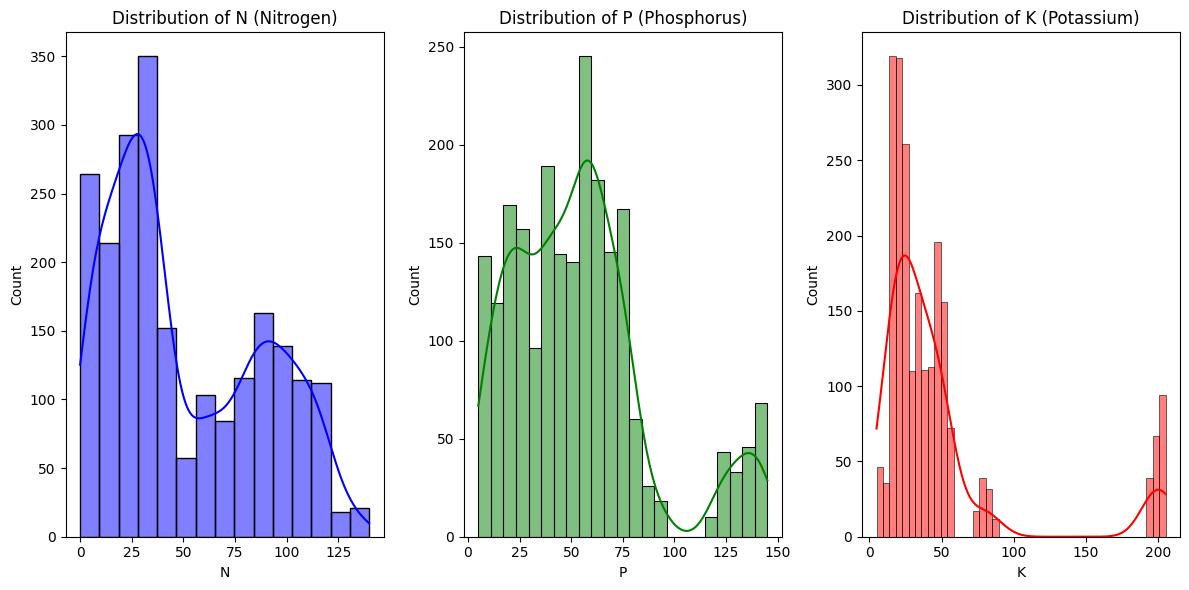

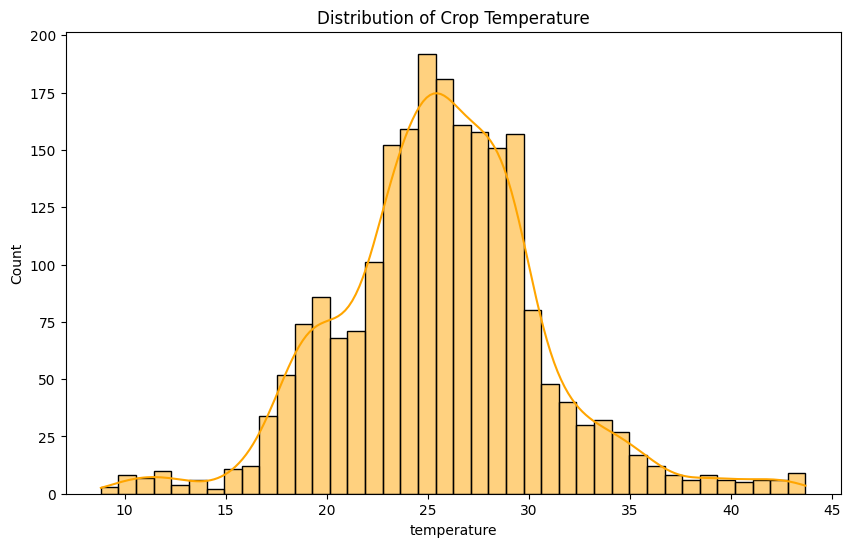

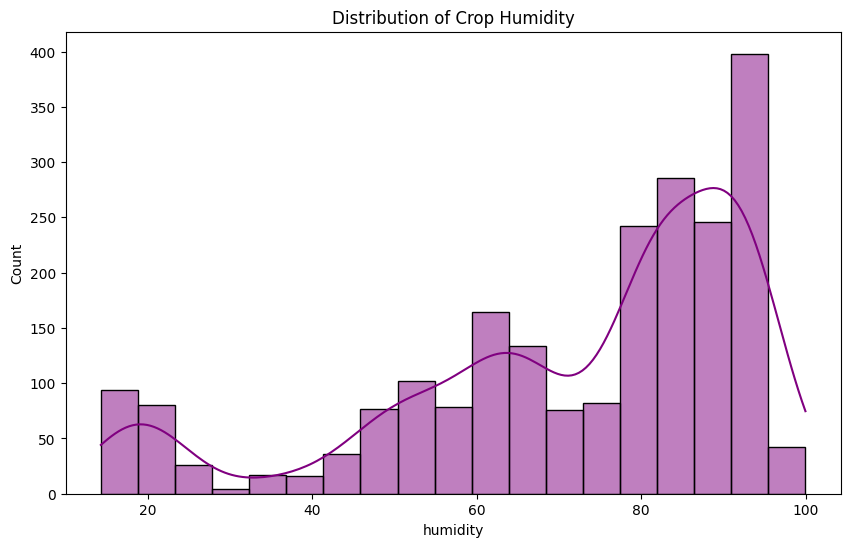

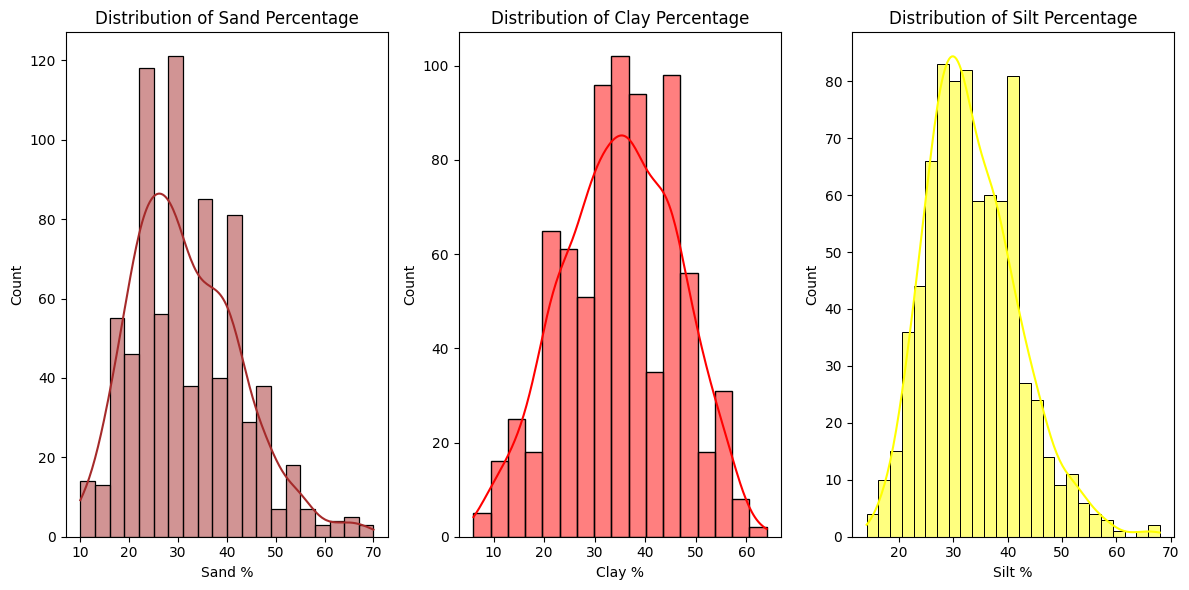

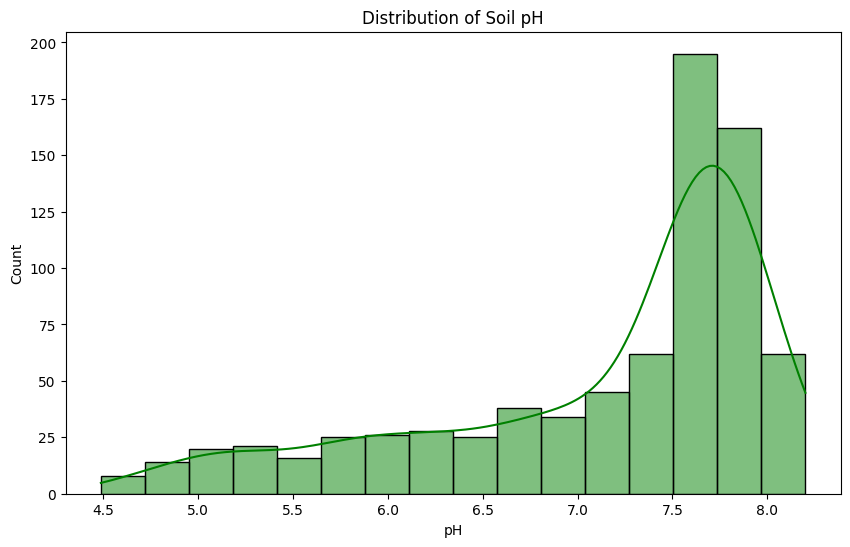

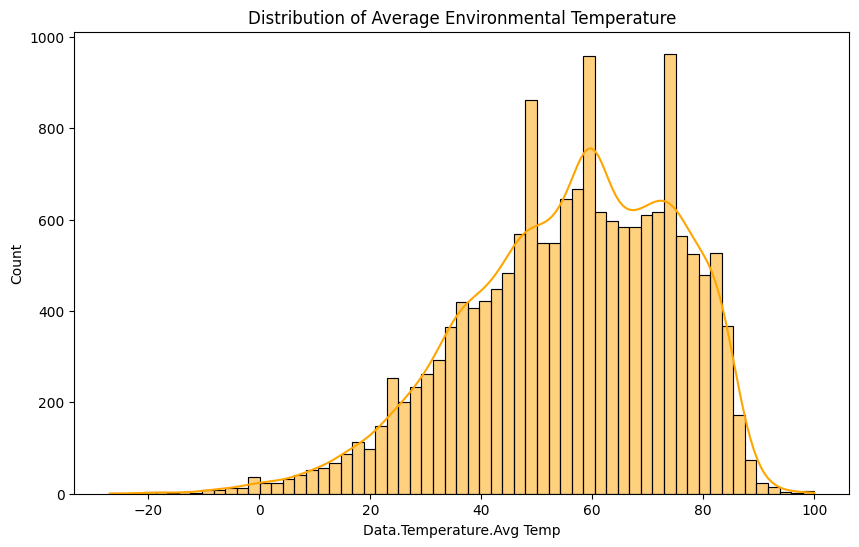

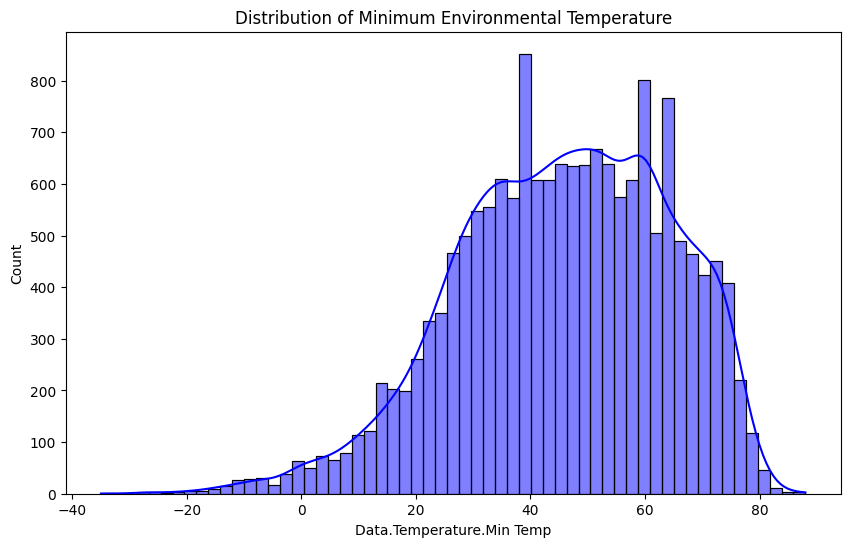

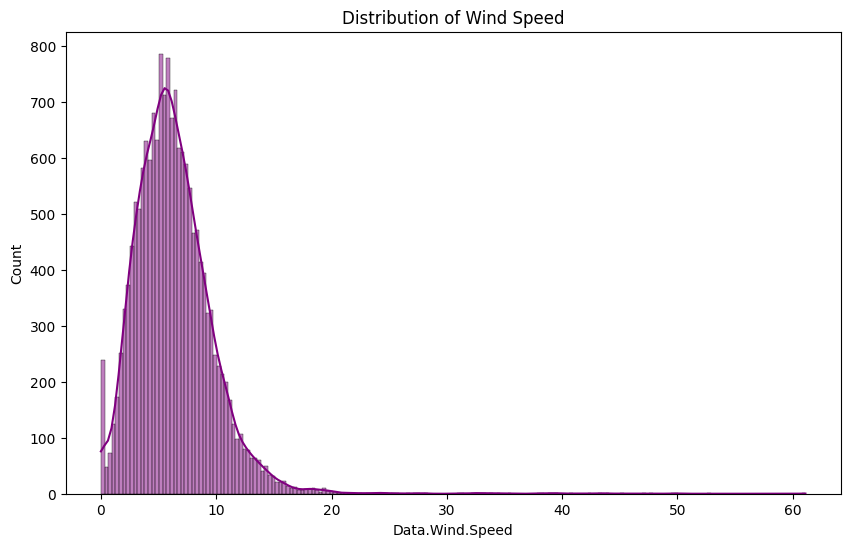

In [2]:
# Crop Data - Visualization of N, P, K
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(crop_data['N'], kde=True, color='blue')
plt.title('Distribution of N (Nitrogen)')
plt.subplot(1, 3, 2)
sns.histplot(crop_data['P'], kde=True, color='green')
plt.title('Distribution of P (Phosphorus)')
plt.subplot(1, 3, 3)
sns.histplot(crop_data['K'], kde=True, color='red')
plt.title('Distribution of K (Potassium)')
plt.tight_layout()
plt.show()

# Crop Data - Visualization of other features
plt.figure(figsize=(10, 6))
sns.histplot(crop_data['temperature'], kde=True, color='orange')
plt.title('Distribution of Crop Temperature')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(crop_data['humidity'], kde=True, color='purple')
plt.title('Distribution of Crop Humidity')
plt.show()

# Soil Data - Visualization of sand, clay, and silt percentages
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(soil_data['Sand %'], kde=True, color='brown')
plt.title('Distribution of Sand Percentage')
plt.subplot(1, 3, 2)
sns.histplot(soil_data['Clay %'], kde=True, color='red')
plt.title('Distribution of Clay Percentage')
plt.subplot(1, 3, 3)
sns.histplot(soil_data['Silt %'], kde=True, color='yellow')
plt.title('Distribution of Silt Percentage')
plt.tight_layout()
plt.show()

# Soil Data - pH Distribution
plt.figure(figsize=(10, 6))
sns.histplot(soil_data['pH'], kde=True, color='green')
plt.title('Distribution of Soil pH')
plt.show()

# Weather Data - Temperature
plt.figure(figsize=(10, 6))
sns.histplot(weather_data['Data.Temperature.Avg Temp'], kde=True, color='orange')
plt.title('Distribution of Average Environmental Temperature')
plt.show()

# Weather Data - Minimum Temperature
plt.figure(figsize=(10, 6))
sns.histplot(weather_data['Data.Temperature.Min Temp'], kde=True, color='blue')
plt.title('Distribution of Minimum Environmental Temperature')
plt.show()

# Weather Data - Wind Speed
plt.figure(figsize=(10, 6))
sns.histplot(weather_data['Data.Wind.Speed'], kde=True, color='purple')
plt.title('Distribution of Wind Speed')
plt.show()

# Pairplot for feature correlations
sns.pairplot(crop_data)
plt.title("Pairplot for Crop Data")
plt.savefig('/content/drive/My Drive/Python Projects/AgroPredict AI/pairplot_crop_data.png')
plt.close()

# Boxplot for potential outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=crop_data[['N', 'P', 'K']])
plt.title('Boxplot for Crop Data')
plt.savefig('/content/drive/My Drive/Python Projects/AgroPredict AI/boxplot_crop_data.png')
plt.close()


In [8]:
from google.colab import drive
# Read data from files
crop_data = pd.read_csv(crop_data_path, encoding='latin1')  # Adjust encoding if necessary
soil_data = pd.read_excel(soil_data_path)
weather_data = pd.read_csv(weather_data_path)

# Function to clean outliers using the IQR method
def remove_outliers(df):
    # Identify numeric columns
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

    # Apply IQR method to each numeric column
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

# Clean crop data
cleaned_crop_data = remove_outliers(crop_data)
print("Crop data after cleaning:")
print(cleaned_crop_data.head())

# Clean soil data
cleaned_soil_data = remove_outliers(soil_data)
print("\nSoil data after cleaning:")
print(cleaned_soil_data.head())

# Clean weather data
cleaned_weather_data = remove_outliers(weather_data)
print("\nWeather data after cleaning:")
print(cleaned_weather_data.head())

# Save cleaned data to Google Drive
cleaned_crop_data.to_csv('/content/drive/My Drive/Python Projects/AgroPredict AI/cleaned_crop_data.csv', index=False)
cleaned_soil_data.to_csv('/content/drive/My Drive/Python Projects/AgroPredict AI/cleaned_soil_data.csv', index=False)
cleaned_weather_data.to_csv('/content/drive/My Drive/Python Projects/AgroPredict AI/cleaned_weather_data.csv', index=False)

print("\nCleaned data successfully saved to Google Drive.")


Crop data after cleaning:
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
7  94  53  40    20.277744  82.894086  5.718627  241.974195  rice
8  89  54  38    24.515881  83.535216  6.685346  230.446236  rice

Soil data after cleaning:
    ID  Sand %  Clay %  Silt %     pH  EC mS/cm    O.M. %  CACO3 %  N_NO3 ppm  \
4    5    33.2    41.2    25.6  7.609     0.392  0.996625     4.39   6.111111   
9   10    31.2    32.8    36.0  7.551     0.483  2.467117     8.71   9.032258   
10  11    29.6    44.8    25.6  7.502     0.445  2.737898     6.95   6.702509   
13  14    51.6    20.8    27.6  7.794     0.448  1.064320    15.67   4.211470   
14  15    42.0    24.0    34.0  7.950     0.397  1.450000    34.50   2.910000   

        P ppm  K ppm   Mg ppm  Fe ppm  Zn ppm  Mn ppm  Cu ppm  B

In [ ]:
ΜΟΝΤΕΛΑ ΠΡΟΒΛΕΨΗΣ

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Data.Precipitation   Date.Full  Date.Month  Date.Week of  Date.Year  \
0                0.00  2016-01-03           1             3       2016   
1                0.00  2016-01-03           1             3       2016   
2                0.16  2016-01-03           1             3       2016   
3                0.00  2016-01-03           1             3       2016   
4                0.01  2016-01-03           1             3       2016   

  Station.City Station.Code Station.Location Station.State  \
0   Birmingham          BHM   Birmingham, AL       Alabama   
1   Huntsville          HSV   Huntsville, AL       Alabama   
2       Mobile          MOB       Mobile, AL       Alabama   
3   Montgomery          MGM   Montgomery, AL       Alabama   
4    Anchorage          ANC    Anchorage, AK        Alaska   

   Data.Temperature.Avg Temp  Data.Temperature.Max Te

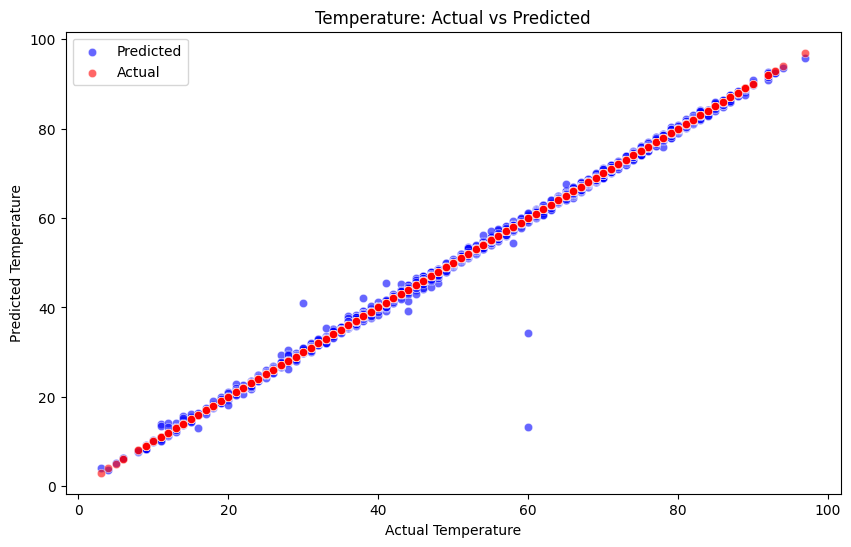

In [4]:
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
data_weather = pd.read_csv('/content/drive/MyDrive/Python Projects/AgroPredict AI/cleaned_weather_data.csv')

# Examine the first rows to see the features and the target variable
print(data_weather.head())

# If the dates are in string format, we either remove or convert them
# Convert the 'Date.Full' column to pandas datetime if you want to extract features from the date
data_weather['Date.Full'] = pd.to_datetime(data_weather['Date.Full'], errors='coerce')

# Create new features from the date (year, month, day, etc.)
data_weather['Year'] = data_weather['Date.Full'].dt.year
data_weather['Month'] = data_weather['Date.Full'].dt.month
data_weather['Day'] = data_weather['Date.Full'].dt.day

# Drop the 'Date.Full' column and other columns that are not useful
data_weather = data_weather.drop(columns=['Date.Full', 'Station.City'])  # Drop columns that are not useful for the model

# Encode categorical columns (e.g., Station.State, Station.Code)
label_encoder = LabelEncoder()

categorical_columns = data_weather.select_dtypes(include=['object']).columns  # Find categorical columns
for col in categorical_columns:
    data_weather[col] = label_encoder.fit_transform(data_weather[col].astype(str))

# Define features and the target variable (excluding date-related and target columns)
X = data_weather.drop(columns=['Data.Temperature.Avg Temp'])  # Remove the target column
Y = data_weather['Data.Temperature.Avg Temp']  # The target is the average temperature

# Split the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train and evaluate the model
model_water = RandomForestRegressor(n_estimators=100, random_state=42)
model_water.fit(X_train, Y_train)

# Make predictions and evaluate
Y_pred_water = model_water.predict(X_test)

# Calculate MSE and R² (Accuracy)
mse_water = mean_squared_error(Y_test, Y_pred_water)
mae_water = mean_absolute_error(Y_test, Y_pred_water)
r2 = r2_score(Y_test, Y_pred_water)

# Print the results
print(f'Mean Squared Error (Temperature): {mse_water}')
print(f'Mean Absolute Error (Temperature): {mae_water}')
print(f'R² (R-squared) Score: {r2}')

# Visualization of predictions vs. actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=Y_test, y=Y_pred_water, color='blue', label='Predicted', alpha=0.6)
sns.scatterplot(x=Y_test, y=Y_test, color='red', label='Actual', alpha=0.6)

plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Temperature: Actual vs Predicted')
plt.legend()
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
3  94  53  40    20.277744  82.894086  5.718627  241.974195  rice
4  89  54  38    24.515881  83.535216  6.685346  230.446236  rice
Evaluation for Nitrogen (N):
Mean Squared Error: 192.55358538829967
Mean Absolute Error: 11.12567760879929
R² Score: 0.8695292472839355

Evaluation for Phosphorus (P):
Mean Squared Error: 108.94992083432432
Mean Absolute Error: 8.225278960047541
R² Score: 0.7975879311561584

Evaluation for Potassium (K):
Mean Squared Error: 33.48712630515424
Mean Absolute Error: 4.227459341448706
R² Score: 0.8872118592262268



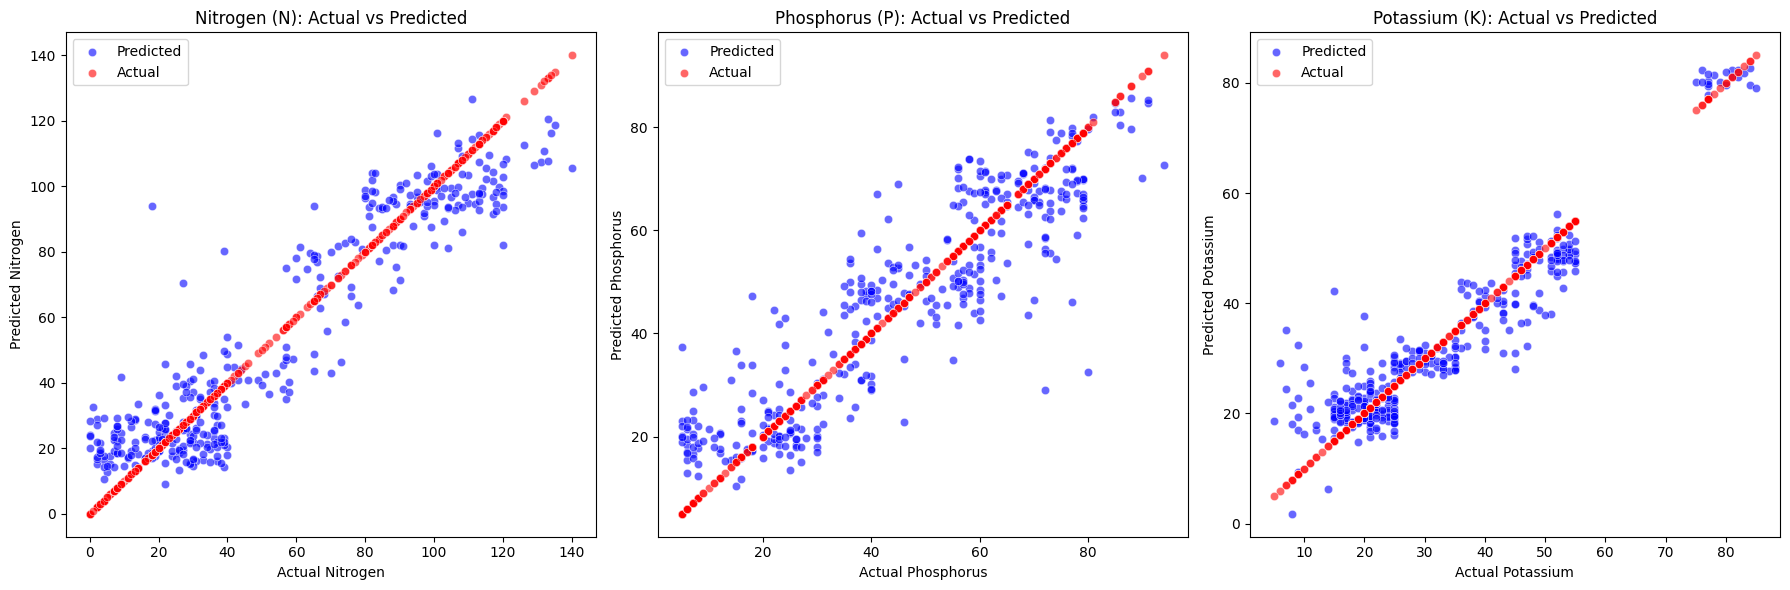

In [5]:

# Mount Google Drive
drive.mount('/content/drive')

# Ensure the file exists at the correct path
path = '/content/drive/MyDrive/Python Projects/AgroPredict AI/cleaned_crop_data.csv'

# Check if the file exists
if not os.path.exists(path):
    raise FileNotFoundError(f"The file {path} was not found on your Google Drive.")

# Load the data from Google Drive
data_crop = pd.read_csv(path)

# Display the first rows to verify the data
print(data_crop.head())

# 1. Data Preparation
X_nutrients = data_crop[['temperature', 'humidity', 'ph', 'rainfall']]  # Features
Y_nitrogen = data_crop['N']  # Target for nitrogen
Y_phosphorus = data_crop['P']  # Target for phosphorus
Y_potassium = data_crop['K']  # Target for potassium

# Split data into training and testing sets
X_train, X_test, Y_train_nitrogen, Y_test_nitrogen = train_test_split(X_nutrients, Y_nitrogen, test_size=0.2, random_state=42)
_, _, Y_train_phosphorus, Y_test_phosphorus = train_test_split(X_nutrients, Y_phosphorus, test_size=0.2, random_state=42)
_, _, Y_train_potassium, Y_test_potassium = train_test_split(X_nutrients, Y_potassium, test_size=0.2, random_state=42)

# 2. Hyperparameter Optimization for XGBoost
xgb_model = XGBRegressor()

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, Y_train_nitrogen)
best_params_nitrogen = grid_search.best_params_

# 3. Training with the Optimized Model
model_nitrogen = XGBRegressor(n_estimators=best_params_nitrogen['n_estimators'],
                               learning_rate=best_params_nitrogen['learning_rate'],
                               max_depth=best_params_nitrogen['max_depth'],
                               subsample=best_params_nitrogen['subsample'])

model_nitrogen.fit(X_train, Y_train_nitrogen)

# 4. Model Evaluation
Y_pred_nitrogen = model_nitrogen.predict(X_test)
mse_nitrogen = mean_squared_error(Y_test_nitrogen, Y_pred_nitrogen)
mae_nitrogen = mean_absolute_error(Y_test_nitrogen, Y_pred_nitrogen)
r2_nitrogen = r2_score(Y_test_nitrogen, Y_pred_nitrogen)

# Train for Phosphorus and Potassium
model_phosphorus = XGBRegressor(n_estimators=best_params_nitrogen['n_estimators'],
                                learning_rate=best_params_nitrogen['learning_rate'],
                                max_depth=best_params_nitrogen['max_depth'],
                                subsample=best_params_nitrogen['subsample'])
model_phosphorus.fit(X_train, Y_train_phosphorus)

Y_pred_phosphorus = model_phosphorus.predict(X_test)
mse_phosphorus = mean_squared_error(Y_test_phosphorus, Y_pred_phosphorus)
mae_phosphorus = mean_absolute_error(Y_test_phosphorus, Y_pred_phosphorus)
r2_phosphorus = r2_score(Y_test_phosphorus, Y_pred_phosphorus)

model_potassium = XGBRegressor(n_estimators=best_params_nitrogen['n_estimators'],
                                learning_rate=best_params_nitrogen['learning_rate'],
                                max_depth=best_params_nitrogen['max_depth'],
                                subsample=best_params_nitrogen['subsample'])
model_potassium.fit(X_train, Y_train_potassium)

Y_pred_potassium = model_potassium.predict(X_test)
mse_potassium = mean_squared_error(Y_test_potassium, Y_pred_potassium)
mae_potassium = mean_absolute_error(Y_test_potassium, Y_pred_potassium)
r2_potassium = r2_score(Y_test_potassium, Y_pred_potassium)

# Save the results to CSV files
results_nitrogen = pd.DataFrame({'Actual': Y_test_nitrogen, 'Predicted': Y_pred_nitrogen})
results_nitrogen.to_csv('/content/drive/MyDrive/Python Projects/AgroPredict AI/results_nitrogen.csv', index=False)

results_phosphorus = pd.DataFrame({'Actual': Y_test_phosphorus, 'Predicted': Y_pred_phosphorus})
results_phosphorus.to_csv('/content/drive/MyDrive/Python Projects/AgroPredict AI/results_phosphorus.csv', index=False)

results_potassium = pd.DataFrame({'Actual': Y_test_potassium, 'Predicted': Y_pred_potassium})
results_potassium.to_csv('/content/drive/MyDrive/Python Projects/AgroPredict AI/results_potassium.csv', index=False)

# Print results
print(f'Evaluation for Nitrogen (N):')
print(f'Mean Squared Error: {mse_nitrogen}')
print(f'Mean Absolute Error: {mae_nitrogen}')
print(f'R² Score: {r2_nitrogen}\n')

print(f'Evaluation for Phosphorus (P):')
print(f'Mean Squared Error: {mse_phosphorus}')
print(f'Mean Absolute Error: {mae_phosphorus}')
print(f'R² Score: {r2_phosphorus}\n')

print(f'Evaluation for Potassium (K):')
print(f'Mean Squared Error: {mse_potassium}')
print(f'Mean Absolute Error: {mae_potassium}')
print(f'R² Score: {r2_potassium}\n')

# Visualization of predictions vs actual values for N, P, K
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Nitrogen (N)
sns.scatterplot(x=Y_test_nitrogen, y=Y_pred_nitrogen, ax=ax[0], color='blue', label='Predicted', alpha=0.6)
sns.scatterplot(x=Y_test_nitrogen, y=Y_test_nitrogen, ax=ax[0], color='red', label='Actual', alpha=0.6)
ax[0].set_title('Nitrogen (N): Actual vs Predicted')
ax[0].set_xlabel('Actual Nitrogen')
ax[0].set_ylabel('Predicted Nitrogen')
ax[0].legend()

# Phosphorus (P)
sns.scatterplot(x=Y_test_phosphorus, y=Y_pred_phosphorus, ax=ax[1], color='blue', label='Predicted', alpha=0.6)
sns.scatterplot(x=Y_test_phosphorus, y=Y_test_phosphorus, ax=ax[1], color='red', label='Actual', alpha=0.6)
ax[1].set_title('Phosphorus (P): Actual vs Predicted')
ax[1].set_xlabel('Actual Phosphorus')
ax[1].set_ylabel('Predicted Phosphorus')
ax[1].legend()

# Potassium (K)
sns.scatterplot(x=Y_test_potassium, y=Y_pred_potassium, ax=ax[2], color='blue', label='Predicted', alpha=0.6)
sns.scatterplot(x=Y_test_potassium, y=Y_test_potassium, ax=ax[2], color='red', label='Actual', alpha=0.6)
ax[2].set_title('Potassium (K): Actual vs Predicted')
ax[2].set_xlabel('Actual Potassium')
ax[2].set_ylabel('Predicted Potassium')
ax[2].legend()

plt.tight_layout()
plt.show()


In [6]:
# Assuming that the label refers to disease risk (1 = High risk, 0 = Low risk)
X = crop_data[['temperature', 'humidity', 'ph', 'rainfall']]  # Features
y = crop_data['label']  # Target (Disease/Pest Risk)

# Check for missing values and replace them
X = X.fillna(X.mean())  # Replace NaN with the mean

# Convert y to numerical values (if it's categorical)
label_encoder = LabelEncoder()

# Check if y contains non-numeric data
if y.dtype == 'object':  # If the column contains text
    y = label_encoder.fit_transform(y)

# Replace missing values in y with the most frequent value (mode)
y = y if not np.any(np.isnan(y)) else np.nan_to_num(y, nan=np.bincount(y).argmax())

# Normalize features (if necessary)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Simplified param_grid for initial testing
param_grid = {
    'n_estimators': [100],  # Reduce numbers for testing purposes
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
}

# Parameter optimization using GridSearchCV
grid_search = GridSearchCV(estimator=xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
                           param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Train the model
try:
    grid_search.fit(X_train, y_train)
except ValueError as e:
    print(f"Error during model fitting: {e}")

# Best model from the grid search
best_model = grid_search.best_estimator_

# Predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate and display accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.2f}")

# Display the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Additional evaluation metrics
f1 = f1_score(y_test, y_pred, average='weighted')  # Or 'macro', 'micro', depending on preference
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test), multi_class='ovr')  # Using one-vs-rest strategy for ROC AUC in multiclass

print(f"\nF1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")


Fitting 3 folds for each of 4 candidates, totalling 12 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:43:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy on test set: 0.96

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        23
           1       1.00      1.00      1.00        21
           2       0.91      1.00      0.95        20
           3       1.00      1.00      1.00        26
           4       1.00      0.96      0.98        27
           5       0.94      1.00      0.97        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       1.00      1.00      1.00        23
           9       1.00      1.00      1.00        20
          10       0.79      1.00      0.88        11
          11       0.86      0.90      0.88        21
          12       0.95      1.00      0.97        19
          13       0.95      0.79      0.86        24
          14       1.00      0.95      0.97        19
          15       1.00      1.00      1.00        17
          16       0.73      0

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


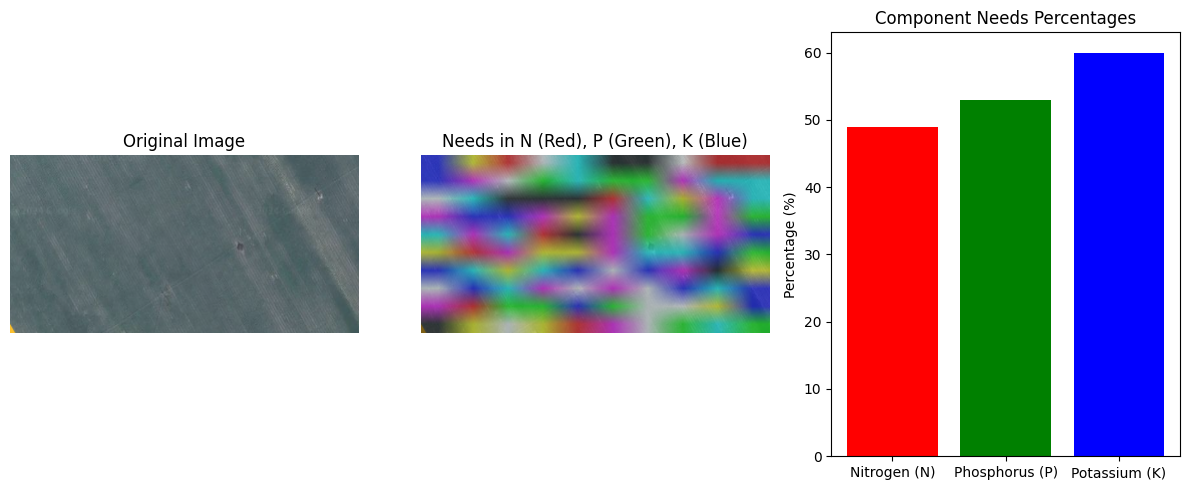

In [7]:
# Required libraries
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# File paths
image_path = '/content/drive/MyDrive/Python Projects/agro.png'
nitrogen_results_path = '/content/drive/MyDrive/Python Projects/AgroPredict AI/results_nitrogen.csv'
phosphorus_results_path = '/content/drive/MyDrive/Python Projects/AgroPredict AI/results_phosphorus.csv'
potassium_results_path = '/content/drive/MyDrive/Python Projects/AgroPredict AI/results_potassium.csv'

# Load field image
field_image = cv2.imread(image_path)
field_image_rgb = cv2.cvtColor(field_image, cv2.COLOR_BGR2RGB)

# Simulate data (replace with actual data)
grid_size = (10, 10)  # Grid dimensions
num_cells = grid_size[0] * grid_size[1]

# Random prediction data (replace with actual predictions)
np.random.seed(42)
predicted_nitrogen = np.random.uniform(10, 200, num_cells).reshape(grid_size)
predicted_phosphorus = np.random.uniform(5, 100, num_cells).reshape(grid_size)
predicted_potassium = np.random.uniform(10, 150, num_cells).reshape(grid_size)

# Create masks for each component
height, width, _ = field_image.shape
overlay_nitrogen = cv2.resize((predicted_nitrogen > 100).astype(np.uint8) * 255, (width, height))
overlay_phosphorus = cv2.resize((predicted_phosphorus > 50).astype(np.uint8) * 255, (width, height))
overlay_potassium = cv2.resize((predicted_potassium > 75).astype(np.uint8) * 255, (width, height))

# Color mask (no mixing)
final_overlay = np.zeros((height, width, 3), dtype=np.uint8)
final_overlay[..., 0] = overlay_nitrogen  # Red for N
final_overlay[..., 1] = overlay_phosphorus  # Green for P
final_overlay[..., 2] = overlay_potassium  # Blue for K

# Combine with the original image
field_with_overlay = cv2.addWeighted(field_image_rgb, 0.5, final_overlay, 0.5, 0)

# Calculate percentages of needs
total_cells = grid_size[0] * grid_size[1]
percentage_n = np.sum(predicted_nitrogen > 100) / total_cells * 100
percentage_p = np.sum(predicted_phosphorus > 50) / total_cells * 100
percentage_k = np.sum(predicted_potassium > 75) / total_cells * 100

# Create bar chart
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.imshow(field_image_rgb)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(field_with_overlay)
plt.title("Needs in N (Red), P (Green), K (Blue)")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.bar(['Nitrogen (N)', 'Phosphorus (P)', 'Potassium (K)'],
        [percentage_n, percentage_p, percentage_k], color=['red', 'green', 'blue'])
plt.title("Component Needs Percentages")
plt.ylabel("Percentage (%)")

plt.tight_layout()
plt.show()
